In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline 
# Sets the backend of matplotlib to 'inline' backend.
from matplotlib import pyplot as plt # plotting
from matplotlib import style # prepackaged plotting styles

import seaborn as sns #prettier and potentially more informative plotting than matplotlib

import string
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

 Understand nature of the data .info() .describe()
 Check for missing/null data
 Get value counts for categorical variables
 Data visualization using histograms, bar charts, and box plots 
 Correlation between the metrices 
 Explore probabilities:- 
    (1)Ladies and children better survival? 
    (2) Very young and elderly better survival?
    (3) having a family advantageous?
    (4) checking via expensive ticket - i.e. Pclass and Fare -  an  indicator of better survival odds?
    (5) More likely to survive with fancy title like Doctor?
    
 Feature engineering 
 preprocess data together or use a transformer? 
    # use label for train and test   
 Scaling/
 Baseline model check 
 comparison with varying CV 

Adding data from dataset 

In [174]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')


Visualising the column names, non-null counts, and data types for each variable in the training data set.

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


A quick summary :=


in total 891 entries
some null values in the Age--177null, Cabin---687null, and Embarked columns---2 nulls.

quick change , a conversion of age presently in float is to convert to integer as all ages is not a  decimal function

cabin null can be a feature update to the likelihood of survival of the passengers
thereby can create category as null_cabin can be helpful for the predictions.

Now,Examining the first few rows of training data

In [176]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Discovering the column names, non-null counts, and data types for each variable in the training data set


In [177]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


summary--There are 418 records in the test dataframe, with null values in Age (86), Fare (1), and Cabin (327)

Examing the first few rows of test data

In [178]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


till now we didn't have any information regarding whether the passenger survived or not !!

So Now, Examining the training dataset numeric and categorical variables;

In [179]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vander Cruyssen, Mr. Victor",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Now the main part comes i.e. *Visualizing the data*
Firstly, let's examine the relationship between Sex and Survived. Our hypothesis(also in accordance with the movie) is that women and children were more likely to survive than men, but was this statistacally true?




**Womwn and Men Survived overall percentage** :--

In [180]:
women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)*100
print("% of women who survived:", round(rate_women, 2), "%")

men = train.loc[train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)*100
print("% of men who survived:", round(rate_men, 2), "%")

% of women who survived: 74.2 %
% of men who survived: 18.89 %


plotting the data into a pie chart representation 

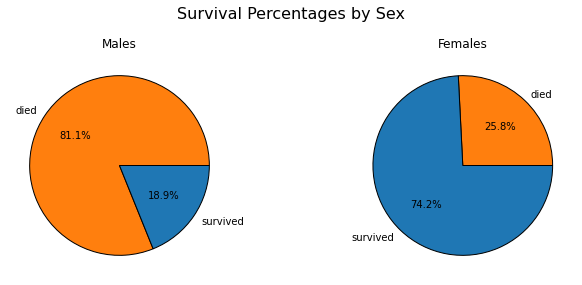

In [181]:
male = train[train['Sex']=='male'].groupby('Survived').count()['Sex']
female = train[train['Sex']=='female'].groupby('Survived').count()['Sex']

#create pie charts for men and women
pie_colors = ['tab:orange', 'tab:blue']
labels = ['died', 'survived']

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
fig.suptitle('Survival Percentages by Sex', fontsize=16)

axs[0].pie(x=male, autopct="%.1f%%", labels=['died', 'survived'], colors=pie_colors, wedgeprops={'edgecolor':'black', 'linewidth':1})
axs[0].set_title('Males')

axs[1].set_title('Females')
axs[1].pie(x=female, autopct="%.1f%%", labels=['died', 'survived'], colors=pie_colors, wedgeprops={'edgecolor':'black', 'linewidth':1})

plt.tight_layout()
plt.show()

similarly , using a barchart !!

In [182]:
counts = train.groupby('Sex').Survived.value_counts()
counts

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

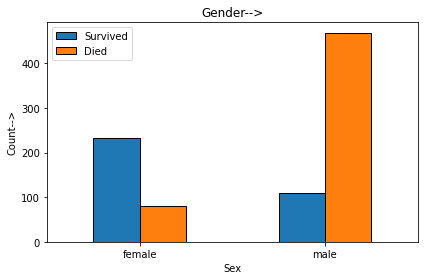

In [183]:
gender_survival = pd.DataFrame({'Sex': ['female', 'male'], 'Survived': [counts[0], counts[3]], 'Died': [counts[1], counts[2]]})
gender_survival.plot(x='Sex', kind='bar', rot=0, title='Gender-->', ylabel='Count-->', edgecolor='black', linewidth=1)
plt.tight_layout()
plt.show()

# Analysing the actual presence of men and women overall on the ship using bar chart 

In [184]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

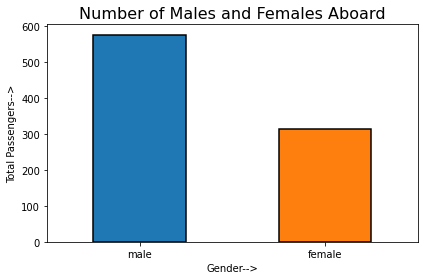

In [185]:
train['Sex'].value_counts().plot(kind='bar', rot=0, edgecolor='black', linewidth=1.5, color=['C0', 'C1'])

plt.title('Number of Males and Females Aboard', fontsize=16)
plt.ylabel('Total Passengers-->')
plt.xlabel('Gender-->', fontsize=10)

plt.tight_layout()
plt.show()

# #A quick analysis :-
as the ratio of survival of women were more than the survival of men beside being in the scenario that number of men is more than women . hence becoming a very strong indicator of whether or not a passenger was to survive the Titanic sinking.

******now,histogram to compare the survival rates across gender and age 

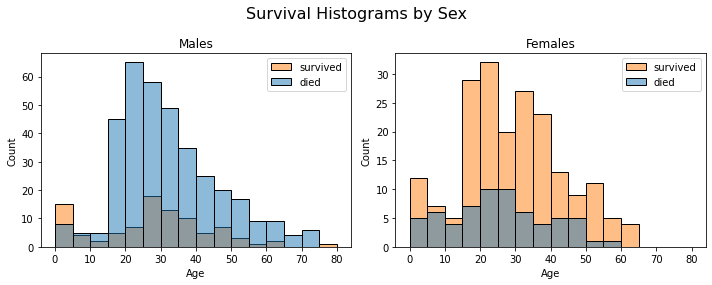

In [186]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(10, 4)) #plotting age on x axis and count on y axis
fig.suptitle('Survival Histograms by Sex', fontsize=16)

ax1 = sns.histplot(data=train[train['Sex']=='male'], x='Age', hue='Survived', binwidth=5, binrange=(0,80), ax=axs[0])
ax2 = sns.histplot(data=train[train['Sex']=='female'], x='Age', hue='Survived', binwidth=5, binrange=(0,80), ax=axs[1])
ax1.set_title('Males')
ax2.set_title('Females')

for ax in [ax1, ax2]:
    ax.legend(labels=['survived', 'died'])

    plt.tight_layout()
plt.show()

hence,
Males between the ages of 15 and 75 were unlikely to survive. Females in all age groups were more likely to survive than perish, but females between the ages of 5 and 15 had relatively higher mortality rates. Let's find out exactly what the rate was for young females

In [187]:
young_females = train[(train['Sex']=='female') & (train['Age']>=5.0) & (train['Age']<=15.0)]
young_females.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,432.923077,0.615385,2.615385,10.326923,1.269231,1.076923,32.474523
std,308.920303,0.496139,0.637302,3.760166,1.484795,0.890980,42.240518
min,10.000000,0.000000,1.000000,5.000000,0.000000,0.000000,7.225000
25%,121.000000,0.000000,2.000000,7.250000,0.000000,0.000000,14.454200
50%,448.000000,1.000000,3.000000,9.500000,1.000000,1.000000,25.200000
75%,713.250000,1.000000,3.000000,14.000000,2.000000,2.000000,31.275000
max,876.000000,1.000000,3.000000,15.000000,4.000000,2.000000,211.337500


checking for young males between age of 5 and 15

In [188]:
young_males = train[(train['Sex']=='male') & (train['Age']>=5.0) & (train['Age']<=15.0)]
young_males.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,470.882353,0.352941,2.823529,10.000000,2.529412,1.294118,34.148288
std,281.671991,0.492592,0.528594,2.622022,1.940285,0.685994,25.613995
min,51.000000,0.000000,1.000000,6.000000,0.000000,0.000000,7.229200
25%,183.000000,0.000000,3.000000,8.000000,1.000000,1.000000,18.787500
50%,490.000000,0.000000,3.000000,9.000000,3.000000,1.000000,29.125000
75%,732.000000,1.000000,3.000000,11.000000,4.000000,2.000000,39.687500
max,820.000000,1.000000,3.000000,15.000000,5.000000,2.000000,120.000000


Females between ages 5 and 15 inclusive had a 61 percent chance of survival. Males in the same age group had a 35 percent chance of survival.


Data Modification :-
**To enhance the dataset, we'll fill in the NaN(not any number) values for Age, Fare, Cabin, and Embarked fields !**

In [189]:
train2 = train.copy()
test2 = test.copy()

df_corr = train2.corr().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
df_corr.rename(columns={'level_0':'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Age']


,Feature 1,Feature 2,Correlation
5,Age,Age,1.000000
16,Age,Fare,0.096067
21,Age,PassengerId,0.036847
37,Age,Survived,-0.077221
40,Age,Parch,-0.189119
42,Age,SibSp,-0.308247
45,Age,Pclass,-0.369226


The strongest positive and negative correlations for Age are with log_fare (0.102) and with Pclass (-.326). SibSp and Parch are also relatively strongly correlated at -.224 and -.168 respectively



Now, data cleaning on the basis of passenger's class or pclass feature!
And hence plotting it via bar chart.

In [190]:
age_via_pclass = train2.groupby(['Sex', 'Pclass'])['Age'].median()
age_via_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

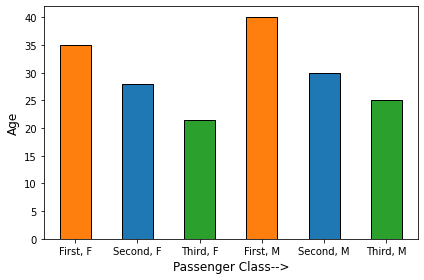

In [191]:
ax = plt.subplot()
age_via_pclass.plot(kind='bar', rot=0, edgecolor='black', linewidth=1, color=['tab:orange', 'tab:blue', 'tab:green'])
plt.ylabel('Age', fontsize=12)
plt.xlabel('Passenger Class-->', fontsize=12)
ax.set_xticklabels(['First, F', 'Second, F', 'Third, F', 'First, M', 'Second, M', 'Third, M'])
plt.tight_layout()
plt.show()

We can see that first class passengers were oldest, followed by second class, then third class, with males slightly older in each category, can use this information to impute the ages for the passengers with missing age values.

In [192]:
train2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [193]:
train2.groupby(['Sex', 'Pclass'])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [194]:
train2.groupby(['Sex', 'Pclass'])['Fare'].median()

Sex     Pclass
female  1         82.66455
        2         22.00000
        3         12.47500
male    1         41.26250
        2         13.00000
        3          7.92500
Name: Fare, dtype: float64

filling up of NaN data(Age,Fare) by just taking the median of values present 

In [195]:
data = [train2, test2]
for dataset in data:
    dataset['Age'] = dataset.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
    dataset['Fare'] = dataset.groupby(['Sex', 'Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))

Arbitrary Check 

In [196]:
train2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [197]:
test2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

The null values for Age are now removed from the new training and test data frames, and have been replaced with the median ages for each Sex/Pclass combination.



now,separating out numeric and categorical variables

In [198]:
train_quant = train.select_dtypes(np.number)
train_quant.drop(['PassengerId'], axis=1, inplace=True)
train_cat = train.select_dtypes('object')
print(train_quant, train_cat)

     Survived  Pclass   Age  SibSp  Parch     Fare
0           0       3  22.0      1      0   7.2500
1           1       1  38.0      1      0  71.2833
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
..        ...     ...   ...    ...    ...      ...
886         0       2  27.0      0      0  13.0000
887         1       1  19.0      0      0  30.0000
888         0       3   NaN      1      2  23.4500
889         1       1  26.0      0      0  30.0000
890         0       3  32.0      0      0   7.7500

[891 rows x 6 columns]                                                   Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Alle

In [199]:
train_quant.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Age distribution:-**


The histogram below indicates that the age variable follows a relatively normal distribution, with most passengers in in the 20-40 year range.

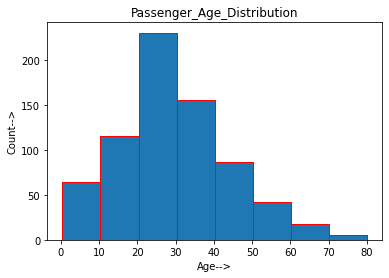

In [200]:
plt.hist(train.Age, bins=8, linewidth=1, edgecolor='red')
plt.title('Passenger_Age_Distribution')
plt.xlabel('Age-->')
plt.ylabel('Count-->')
plt.show()

* **Fare**


The Fare distribution is heavily right skewed, indicating a small number of passengers purchasing very expensive tickets. Using a log transformation, we can normalize this variable.

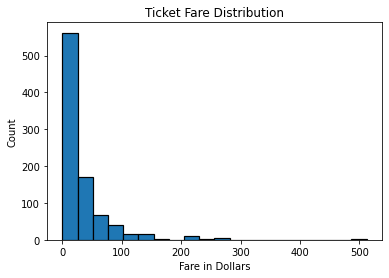

In [201]:
plt.hist(train.Fare, bins=20, linewidth=1.2, edgecolor='black')
plt.title("Ticket Fare Distribution")
plt.ylabel("Count")
plt.xlabel("Fare in Dollars")
plt.show()

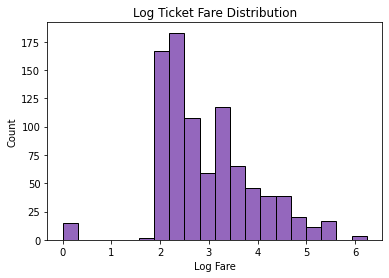

In [202]:
train['log_fare'] = np.log(train['Fare']+1)
test['log_fare'] = np.log(test['Fare']+1)
plt.hist(train.log_fare, bins=20, linewidth=1, edgecolor='black', color='C4')
plt.title("Log Ticket Fare Distribution")
plt.ylabel("Count")
plt.xlabel("Log Fare")
plt.show()

In [203]:
train2['log_fare'] = np.log(train2['Fare']+1)
test2['log_fare'] = np.log(test2['Fare']+1)

In [204]:
train2['Title'] = train2['Name'].apply(lambda x: x.split(', ', 5)[1].split('.', 5)[0])
test2['Title'] = train2['Name'].apply(lambda x: x.split(', ', 5)[1].split('.', 5)[0])
print(train2['Title'].unique())
print(test2['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme']


In [205]:
train2.groupby('Title').Survived.value_counts()

Title         Survived
Capt          0             1
Col           0             1
              1             1
Don           0             1
Dr            0             4
              1             3
Jonkheer      0             1
Lady          1             1
Major         0             1
              1             1
Master        1            23
              0            17
Miss          1           127
              0            55
Mlle          1             2
Mme           1             1
Mr            0           436
              1            81
Mrs           1            99
              0            26
Ms            1             1
Rev           0             6
Sir           1             1
the Countess  1             1
Name: Survived, dtype: int64

In [206]:
train2.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Capt              1
Don               1
the Countess      1
Sir               1
Jonkheer          1
Ms                1
Mme               1
Name: Title, dtype: int64

If were a Miss, Mrs, Master, Sir, Countess, etc. you seem to have had a better chance.

using Cabin data for analysis 

Maybe we can create variabes using the first letter of the cabin A-F, and include nan as a category, since many passengers didn't have a cabin.

In [207]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [208]:
data = [train2, test2]
import re

for dataset in data:
    dataset['cabin_first_letter'] = dataset['Cabin'].apply(lambda x: str(x)[0])
    dataset['had_cabin'] = [0 if dataset['Cabin'].isnull()[i] else 1 for i in range(len(dataset))]
print(train2['cabin_first_letter'].value_counts())
print(train2['had_cabin'].value_counts())
print(test2['cabin_first_letter'].value_counts())
print(test2['had_cabin'].value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_first_letter, dtype: int64
0    687
1    204
Name: had_cabin, dtype: int64
n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: cabin_first_letter, dtype: int64
0    327
1     91
Name: had_cabin, dtype: int64


Examine relationship between cabin and survival.

In [209]:
train2.groupby(['cabin_first_letter'])['Survived'].mean()

cabin_first_letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [210]:
train2['cabin_first_letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_first_letter, dtype: int64

In [211]:
test2['cabin_first_letter'].value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: cabin_first_letter, dtype: int64

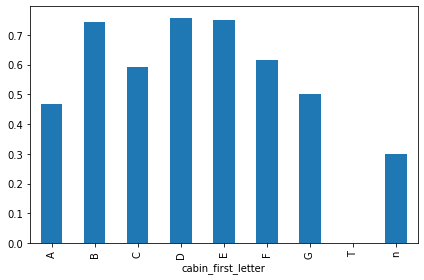

In [212]:
train2.groupby('cabin_first_letter')['Survived'].mean().plot(kind='bar', x='cabin_first_letter', y='Survived')
plt.tight_layout()
plt.show()

In [213]:
for dataset in data:
    dataset['Title'].replace(['Lady', 'Ms', 'Mlle'], 'Miss', inplace=True)
    dataset['Title'].replace('Mme', 'Mrs', inplace=True)

In [214]:
train2.Title.value_counts()

Mr              517
Miss            186
Mrs             126
Master           40
Dr                7
Rev               6
Major             2
Col               2
Jonkheer          1
the Countess      1
Sir               1
Don               1
Capt              1
Name: Title, dtype: int64

In [215]:
test2.Title.value_counts()

Mr        228
Miss      101
Mrs        59
Master     23
Rev         3
Dr          3
Don         1
Name: Title, dtype: int64

In [216]:
popular_titles = [i for i in train2.Title.unique() if train2.Title.value_counts().loc[i]>10]
print(popular_titles)

['Mr', 'Mrs', 'Miss', 'Master']


In [217]:
for dataset in data:
    dataset['Popular_title'] = [dataset['Title'][i] if dataset['Title'][i] in popular_titles else 'Other' for i in range(len(dataset))]

In [218]:
train2['Popular_title'].value_counts()


Mr        517
Miss      186
Mrs       126
Master     40
Other      22
Name: Popular_title, dtype: int64

In [219]:
test2['Popular_title'].value_counts()

Mr        228
Miss      101
Mrs        59
Master     23
Other       7
Name: Popular_title, dtype: int64

In [220]:
for dataset in data:
    dataset['Sex'] = [1 if dataset['Sex'][i] == 'male' else 0 for i in range(len(dataset))]

In [221]:
train2['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [222]:
train2['Embarked'] = train2['Embarked'].fillna('S')

In [223]:
train2 = train2.drop(columns=['Fare'])
test2 = test2.drop(columns=['Fare'])

mapping of S,C,Q

In [224]:
train2['Embarked'] = train2['Embarked'].map({'S':1, 'C':2, 'Q':3})
test2['Embarked'] = test2['Embarked'].map({'S':1, 'C':2, 'Q':3})

mapping of popular title on based to eliminte NaN values 

In [225]:
train2['Popular_title'] = train2['Popular_title'].map({'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Other':5})
test2['Popular_title'] = test2['Popular_title'].map({'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Other':5})

In [226]:
train3 = train2[['Popular_title','Age','Sex','Pclass','log_fare','Parch','SibSp','had_cabin','Survived']]
test3 = test2[['Popular_title','Age','Sex','Pclass','log_fare','Parch','SibSp','had_cabin']]

merging of two features to one 

In [227]:
train3['fam_size'] = train3['Parch'] + train3['SibSp']
test3['fam_size'] = test3['Parch'] + test3['SibSp']


In [228]:
train3.drop(columns=['Parch','SibSp'], inplace=True)

In [229]:
test3.drop(columns=['Parch','SibSp'], inplace=True)

In [230]:
train3.head()

,Popular_title,Age,Sex,Pclass,log_fare,had_cabin,Survived,fam_size
0,1,22.0,1,3,2.110213,0,0,1
1,2,38.0,0,1,4.280593,1,1,1
2,3,26.0,0,3,2.188856,0,1,0
3,2,35.0,0,1,3.990834,1,1,1
4,1,35.0,1,3,2.202765,0,0,0


In [231]:
test3.tail()

,Popular_title,Age,Sex,Pclass,log_fare,had_cabin,fam_size
413,1,24.0,1,3,2.202765,0,0
414,1,39.0,0,1,4.699571,1,0
415,2,38.5,1,3,2.110213,0,0
416,2,24.0,1,3,2.202765,0,0
417,3,24.0,1,3,3.150952,0,2


Finally ,**Modeling**  

using ,a Random Forest Classifier, based on the features we think have the greatest impact on survival.

In [232]:
from sklearn.ensemble import RandomForestClassifier

y = train3["Survived"]

features = ['Age','Sex','Pclass','log_fare','had_cabin']
X = train3[features]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=1)

In [233]:
X_test = test3[features]

In [234]:
predictions = model.predict(X_test)

In [235]:
output = pd.DataFrame({'PassengerId': test2.PassengerId, 'Survived': predictions})
output.to_csv('random_forest.csv', index=False)
print("Your submission was successfully saved! This model was pretty accurate, with a score of " + str(model.score(X,y)))

Your submission was successfully saved! This model was pretty accurate, with a score of 0.8619528619528619


In [236]:
features


['Age', 'Sex', 'Pclass', 'log_fare', 'had_cabin']

In [237]:
model.feature_importances_

array([0.13502004, 0.47891197, 0.1308349 , 0.18251106, 0.07272204])